In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the provided Excel file
file_path = "DSCI 5330 Assignment 2_Group5_Final Version1.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
xls.sheet_names


['Income Statement ',
 'Molina_SG&A',
 'Balance Sheet',
 'Cash Flow Statement',
 'Analysis']

In [ ]:
# Load data from relevant sheets that may contain marketing-related information
sheets_to_check = ['Income Statement ', 'Balance Sheet', 'Cash Flow Statement']
dfs = {sheet: xls.parse(sheet) for sheet in sheets_to_check}

# Display the first few rows of each selected sheet to identify relevant marketing data
dfs_overview = {sheet: df.head() for sheet, df in dfs.items()}
dfs_overview

{'Income Statement ':   Millions of US $ except per share data  Unnamed: 1  Unnamed: 2  Unnamed: 3  \
 0                                   Year      2015.0      2016.0      2017.0   
 1                                Revenue    157107.0    184840.0    201159.0   
 2                     Cost Of Goods Sold    120081.0    141454.0    154148.0   
 3                           Gross Profit     37026.0     43386.0     47011.0   
 4     Other Operating Income Or Expenses    -24312.0    -28401.0    -29557.0   
 
    Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
 0      2018.0      2019.0      2020.0      2021.0      2022.0      2023.0   
 1    226247.0    242155.0    257141.0    287597.0    324162.0    371622.0   
 2    172401.0    184557.0    190141.0    217945.0    244545.0    280664.0   
 3     53846.0     57598.0     67000.0     69652.0     79617.0     90958.0   
 4    -34074.0    -35193.0    -41704.0    -42579.0    -47782.0    -54628.0   
 
    Unnamed: 10  
 0 

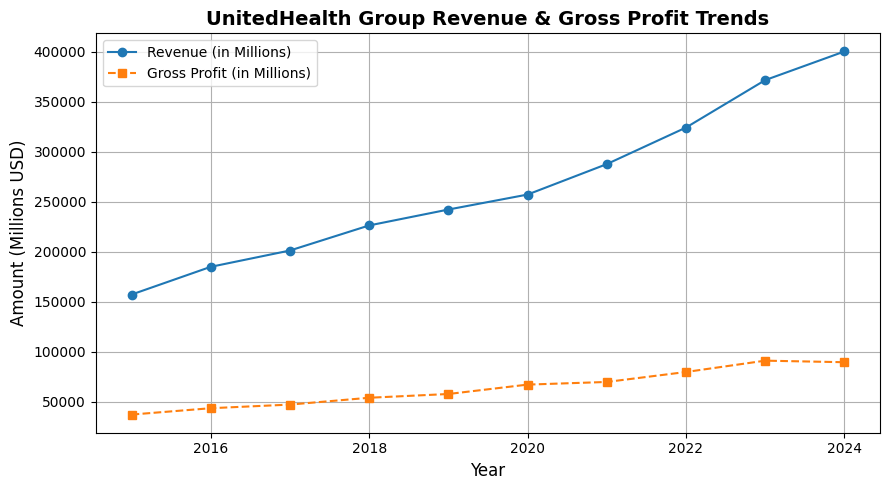

In [ ]:
# Step 1: Load the "Income Statement " sheet from the Excel file
income_data = pd.read_excel(file_path, sheet_name='Income Statement ', header=1)

# Step 2: Clean column names (rename the first column as 'Metric')
income_data.rename(columns={income_data.columns[0]: 'Metric'}, inplace=True)

# Step 3: Extract year columns
years = [col for col in income_data.columns if isinstance(col, int) or (isinstance(col, str) and col.isdigit())]

# Step 4: Extract Revenue and Gross Profit values
revenue = income_data[income_data['Metric'] == 'Revenue'][years].values.flatten()
gross_profit = income_data[income_data['Metric'] == 'Gross Profit'][years].values.flatten()

# Step 5: Plot using Matplotlib
plt.figure(figsize=(9, 5))
plt.plot(years, revenue, marker='o', linestyle='-', label='Revenue (in Millions)')
plt.plot(years, gross_profit, marker='s', linestyle='--', label='Gross Profit (in Millions)')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (Millions USD)", fontsize=12)
plt.title("UnitedHealth Group Revenue & Gross Profit Trends", fontsize=14,fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


   Year  Revenue (M)  Gross Profit (M)  Net Income (M)  Gross Margin %  \
0  2015     157107.0           37026.0          5868.0           23.57   
1  2016     184840.0           43386.0          7073.0           23.47   
2  2017     201159.0           47011.0         10823.0           23.37   
3  2018     226247.0           53846.0         12382.0           23.80   
4  2019     242155.0           57598.0         14239.0           23.79   
5  2020     257141.0           67000.0         15769.0           26.06   
6  2021     287597.0           69652.0         17732.0           24.22   
7  2022     324162.0           79617.0         20639.0           24.56   
8  2023     371622.0           90958.0         23144.0           24.48   
9  2024     400278.0           89399.0         15242.0           22.33   

   Net Margin %  ROE %  Revenue YoY Growth %  Net Income YoY Growth %  
0          3.74  18.08                   NaN                      NaN  
1          3.83  20.97                 17

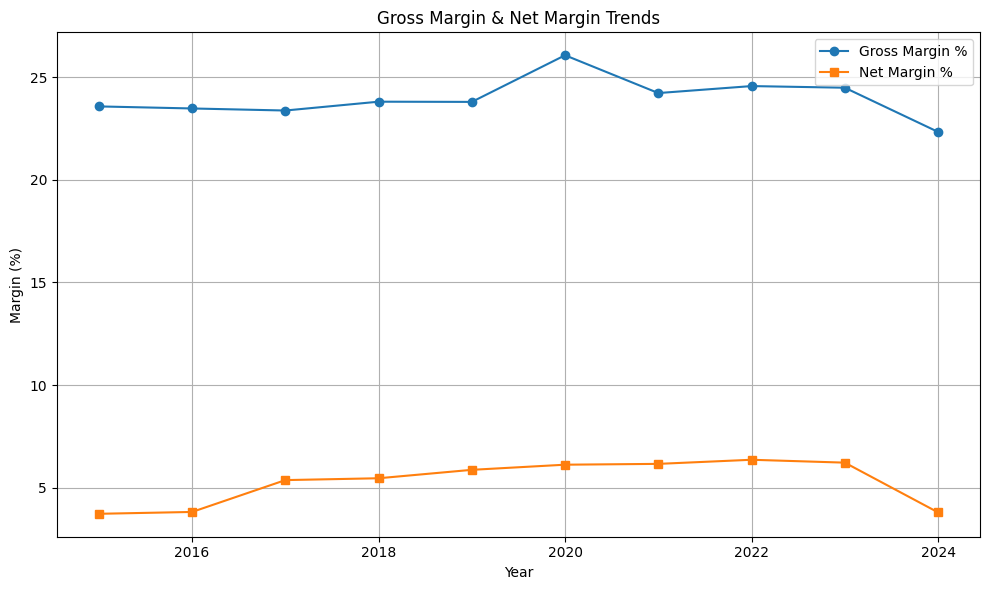

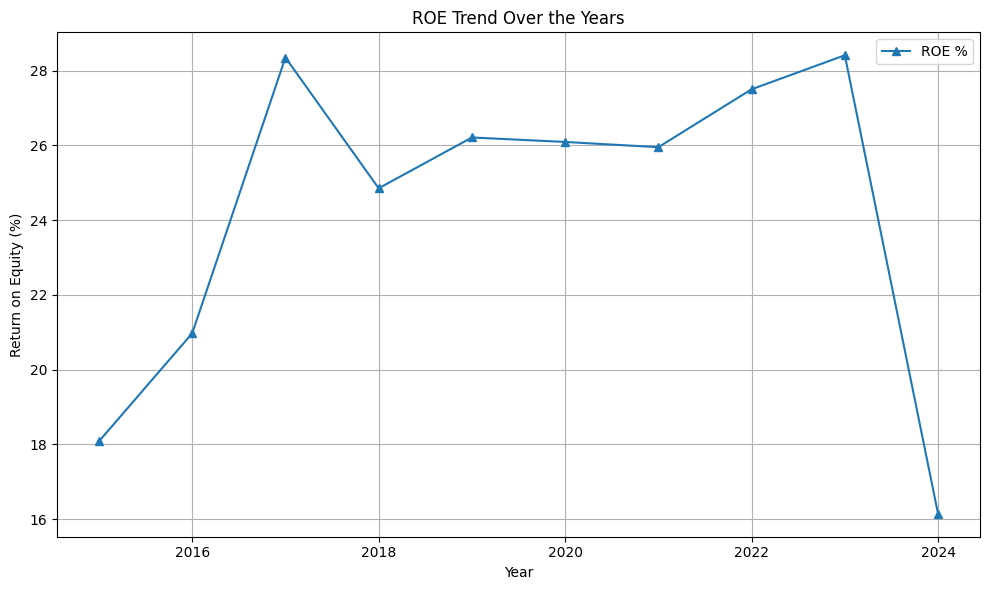

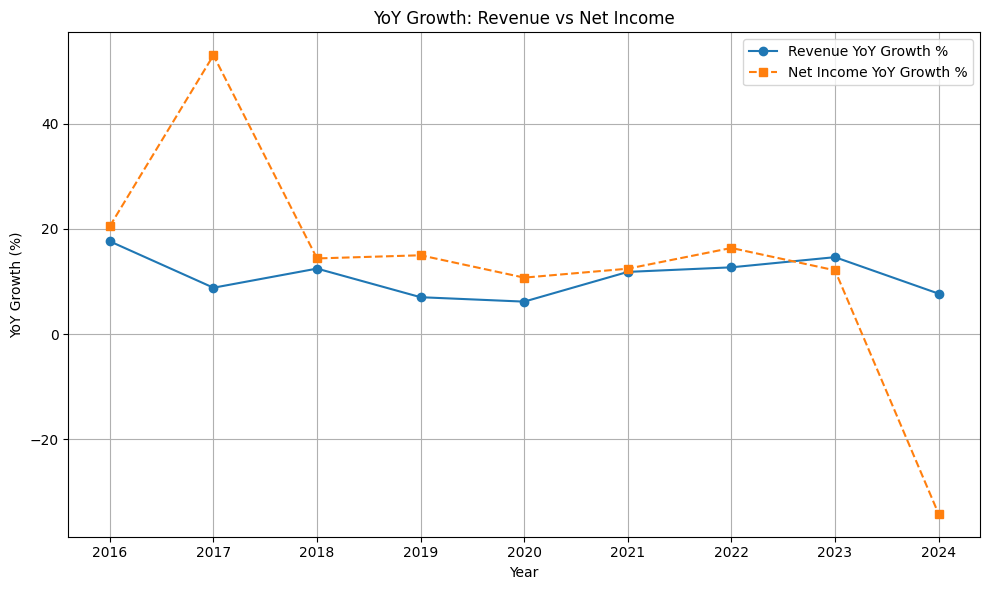

In [ ]:
income_data = pd.read_excel(file_path, sheet_name='Income Statement ', header=1)
balance_sheet = pd.read_excel(file_path, sheet_name='Balance Sheet', header=1)
cashflow_data = pd.read_excel(file_path, sheet_name='Cash Flow Statement', header=1)

income_data.rename(columns={income_data.columns[0]: 'Metric'}, inplace=True)
balance_sheet.rename(columns={balance_sheet.columns[0]: 'Metric'}, inplace=True)
cashflow_data.rename(columns={cashflow_data.columns[0]: 'Metric'}, inplace=True)

years = [col for col in income_data.columns if isinstance(col, int) or (isinstance(col, str) and col.isdigit())]

# Step 2: Extract Metrics
revenue = income_data[income_data['Metric'] == 'Revenue'][years].values.flatten()
gross_profit = income_data[income_data['Metric'] == 'Gross Profit'][years].values.flatten()
net_income = cashflow_data[cashflow_data['Metric'] == 'Net Income/Loss'][years].values.flatten()
total_equity = balance_sheet[balance_sheet['Metric'] == "Share Holder Equity"][years].values.flatten()

# Step 3: Calculate Ratios
gross_margin = gross_profit / revenue
net_margin = net_income / revenue
roe = net_income / total_equity
revenue_growth = (pd.Series(revenue).pct_change() * 100).round(2)
net_income_growth = (pd.Series(net_income).pct_change() * 100).round(2)

# Step 4: Create DataFrame for Report
metrics_df = pd.DataFrame({
    "Year": years,
    "Revenue (M)": revenue,
    "Gross Profit (M)": gross_profit,
    "Net Income (M)": net_income,
    "Gross Margin %": (gross_margin * 100).round(2),
    "Net Margin %": (net_margin * 100).round(2),
    "ROE %": (roe * 100).round(2),
    "Revenue YoY Growth %": revenue_growth,
    "Net Income YoY Growth %": net_income_growth
})

print(metrics_df)

# Step 5: Visualize the Ratios

# Gross & Net Margin plot
plt.figure(figsize=(10,6))
plt.plot(metrics_df['Year'], metrics_df['Gross Margin %'], marker='o', label='Gross Margin %')
plt.plot(metrics_df['Year'], metrics_df['Net Margin %'], marker='s', label='Net Margin %')
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.title("Gross Margin & Net Margin Trends")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ROE plot
plt.figure(figsize=(10,6))
plt.plot(metrics_df['Year'], metrics_df['ROE %'], marker='^', linestyle='-', label='ROE %')
plt.xlabel("Year")
plt.ylabel("Return on Equity (%)")
plt.title("ROE Trend Over the Years")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Revenue & Net Income Growth Rate plot
plt.figure(figsize=(10,6))
plt.plot(metrics_df['Year'], metrics_df['Revenue YoY Growth %'], marker='o', linestyle='-', label='Revenue YoY Growth %')
plt.plot(metrics_df['Year'], metrics_df['Net Income YoY Growth %'], marker='s', linestyle='--', label='Net Income YoY Growth %')
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.title("YoY Growth: Revenue vs Net Income")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


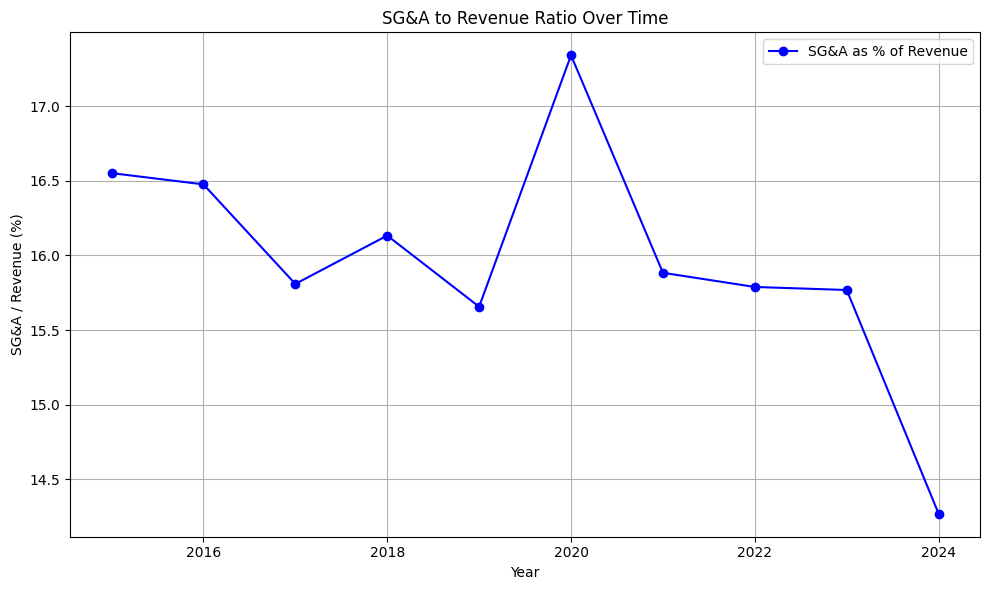

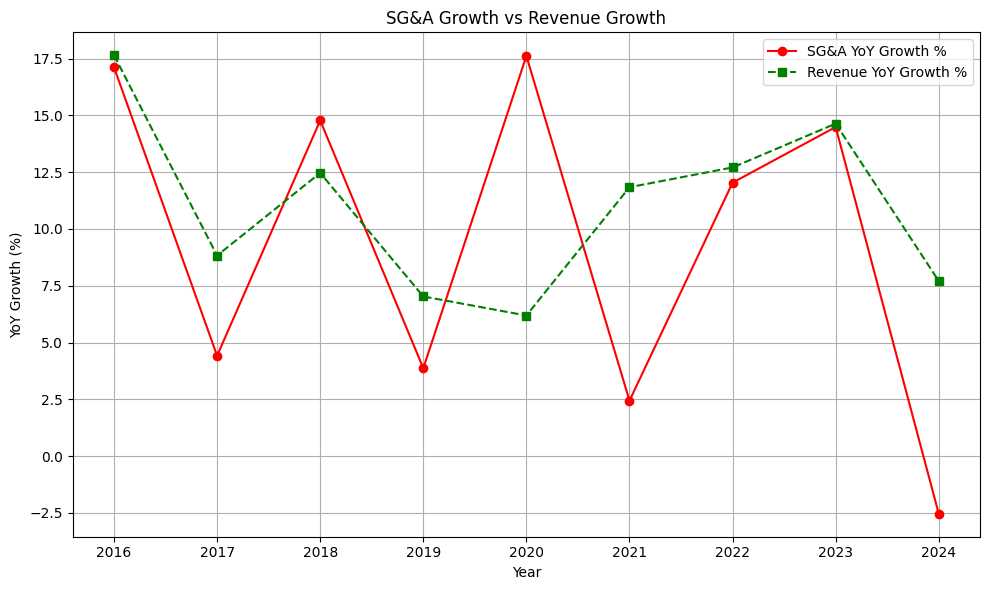

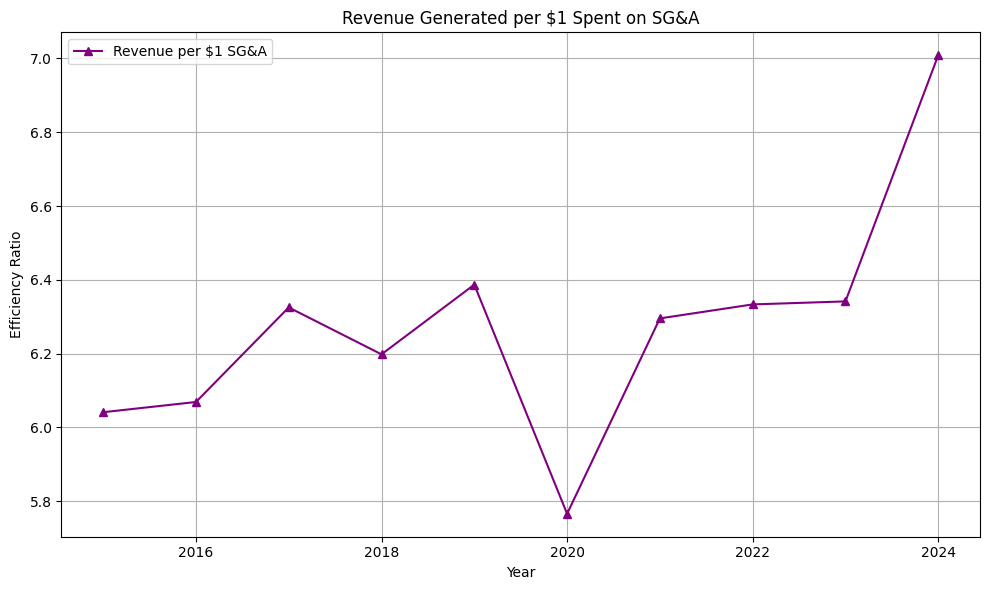

In [ ]:
# Load Income Statement sheet
income_data = pd.read_excel(file_path, sheet_name='Income Statement ', header=1)

# Clean column names
income_data.rename(columns={income_data.columns[0]: 'Metric'}, inplace=True)

# Extract year columns dynamically
years = [col for col in income_data.columns if isinstance(col, int) or (isinstance(col, str) and col.isdigit())]

# Extract relevant metrics
revenue = income_data[income_data['Metric'] == 'Revenue'][years].values.flatten()
operating_expenses = income_data[income_data['Metric'] == 'Operating Expenses'][years].values.flatten()

# 1️⃣ SG&A to Revenue Ratio
sgna_ratio = operating_expenses / revenue

# 2️⃣ SG&A vs Revenue YoY Growth Rates
sgna_growth = (pd.Series(operating_expenses).pct_change() * 100).round(2)
revenue_growth = (pd.Series(revenue).pct_change() * 100).round(2)

# 3️⃣ Revenue per $1 of SG&A
revenue_per_sgna = revenue / operating_expenses

# ------------------ VISUALIZATIONS ------------------ #

# Plot 1: SG&A to Revenue ratio trend
plt.figure(figsize=(10,6))
plt.plot(years, sgna_ratio * 100, marker='o', color='blue', label='SG&A as % of Revenue')
plt.title('SG&A to Revenue Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('SG&A / Revenue (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: SG&A Growth vs Revenue Growth
plt.figure(figsize=(10,6))
plt.plot(years, sgna_growth, marker='o', color='red', label='SG&A YoY Growth %')
plt.plot(years, revenue_growth, marker='s', linestyle='--', color='green', label='Revenue YoY Growth %')
plt.title('SG&A Growth vs Revenue Growth')
plt.xlabel('Year')
plt.ylabel('YoY Growth (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Revenue per $1 of SG&A
plt.figure(figsize=(10,6))
plt.plot(years, revenue_per_sgna, marker='^', color='purple', label='Revenue per $1 SG&A')
plt.title('Revenue Generated per $1 Spent on SG&A')
plt.xlabel('Year')
plt.ylabel('Efficiency Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


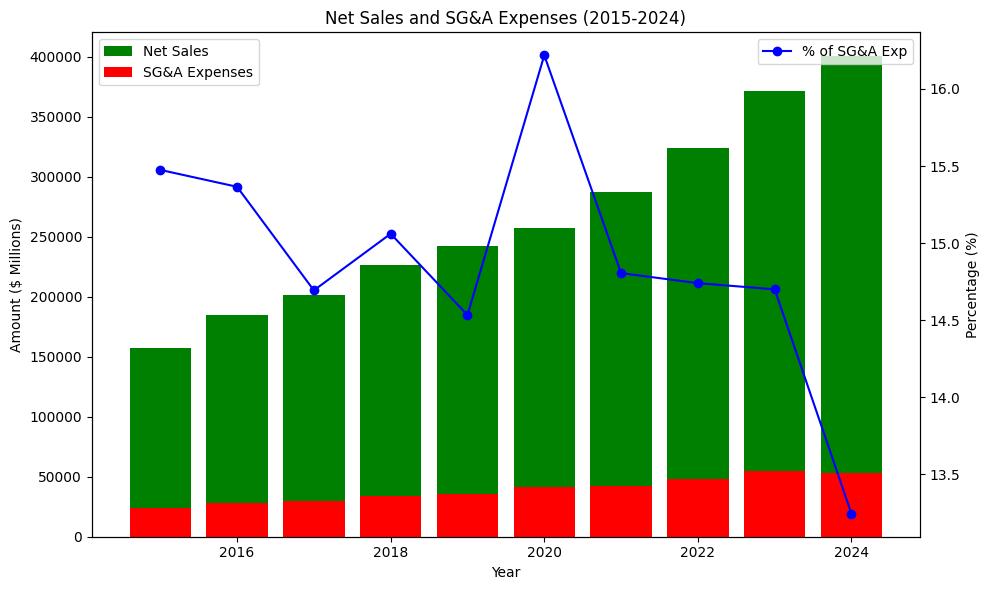

In [18]:
# Load the relevant sheet
financial_data = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract relevant data (Years, Revenue, and SG&A Expenses)
years = financial_data.iloc[0, 1:].values  # Extract year columns
revenue = financial_data[financial_data['Millions of US $ except per share data'] == 'Revenue'].iloc[0, 1:].values
sgna_expenses = -financial_data[financial_data['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].values

# Plot Net Sales and SG&A Expenses
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart with 2 different colors
ax1.bar(years, revenue, color='green', label='Net Sales')
ax1.bar(years, sgna_expenses, color='red', label='SG&A Expenses')
ax1.set_xlabel("Year")
ax1.set_ylabel("Amount ($ Millions)")
ax1.set_title("Net Sales and SG&A Expenses (2015-2024)")
ax1.legend(loc="upper left")

# Line Chart for % of SG&A Expenses with a 3rd color
ax2 = ax1.twinx()
sgna_percentage = (sgna_expenses / revenue) * 100
ax2.plot(years, sgna_percentage, marker='o', linestyle='-', color='blue', label='% of SG&A Exp')
ax2.set_ylabel("Percentage (%)")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


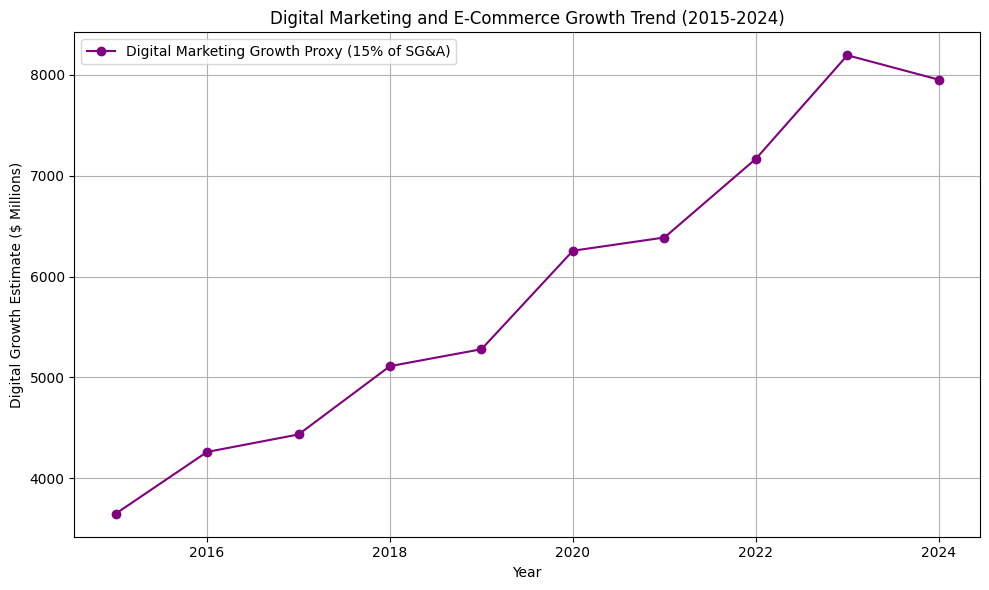

In [19]:
# Load the relevant sheet
financial_data = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract data
years = financial_data.iloc[0, 1:].values  # Year column
sgna_expenses = -financial_data[financial_data['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].values

# Estimate digital marketing growth (assumed to be 15% of SG&A expenses)
digital_growth_estimate = sgna_expenses * 0.15

# Plotting the digital marketing and e-commerce growth trend
plt.figure(figsize=(10, 6))
plt.plot(years, digital_growth_estimate, marker='o', linestyle='-', color='purple', label="Digital Marketing Growth Proxy (15% of SG&A)")
plt.xlabel("Year")
plt.ylabel("Digital Growth Estimate ($ Millions)")
plt.title("Digital Marketing and E-Commerce Growth Trend (2015-2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


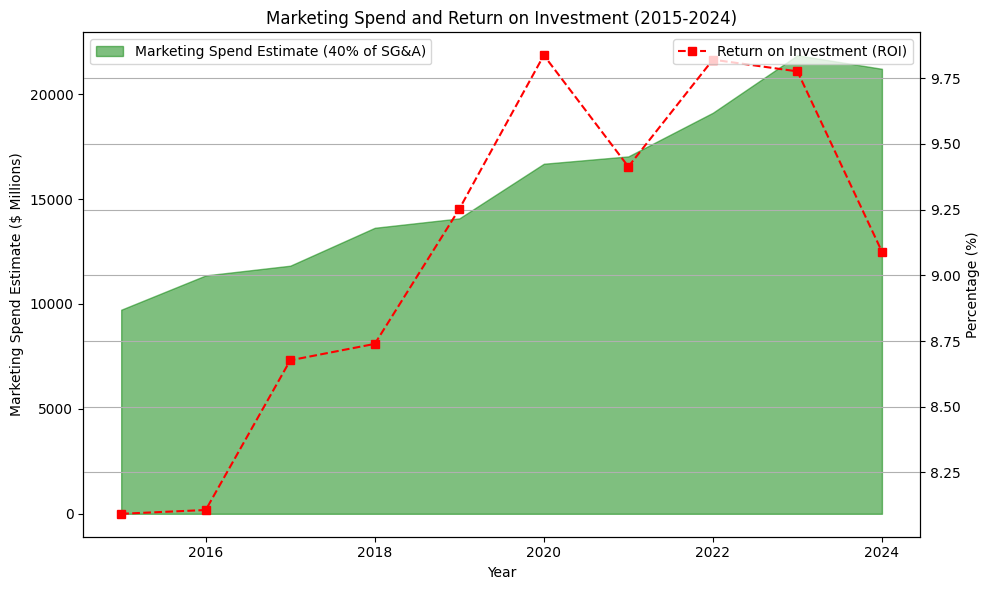

In [22]:
# Load the relevant sheet
financial_data = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract data and ensure they are numeric
years = pd.to_numeric(financial_data.iloc[0, 1:].values, errors='coerce')
revenue = pd.to_numeric(financial_data[financial_data['Millions of US $ except per share data'] == 'Revenue'].iloc[0, 1:].values, errors='coerce')
sgna_expenses = -pd.to_numeric(financial_data[financial_data['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].values, errors='coerce')
operating_income = pd.to_numeric(financial_data[financial_data['Millions of US $ except per share data'] == 'Gross Profit'].iloc[0, 1:].values, errors='coerce') + \
                   pd.to_numeric(financial_data[financial_data['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].values, errors='coerce')

# Marketing spend as 40% of SG&A
marketing_spend = sgna_expenses * 0.4

# ROI calculation
roi = (operating_income / revenue) * 100

# Plotting with new styles
fig, ax1 = plt.subplots(figsize=(10, 6))

# Area chart for Marketing Spend
ax1.fill_between(years, marketing_spend, color='green', alpha=0.5, label='Marketing Spend Estimate (40% of SG&A)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Marketing Spend Estimate ($ Millions)")
ax1.set_title("Marketing Spend and Return on Investment (2015-2024)")
ax1.legend(loc="upper left")

# Dashed red line with square markers for ROI
ax2 = ax1.twinx()
ax2.plot(years, roi, marker='s', linestyle='--', color='red', label='Return on Investment (ROI)')
ax2.set_ylabel("Percentage (%)")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.grid(True)
plt.show()


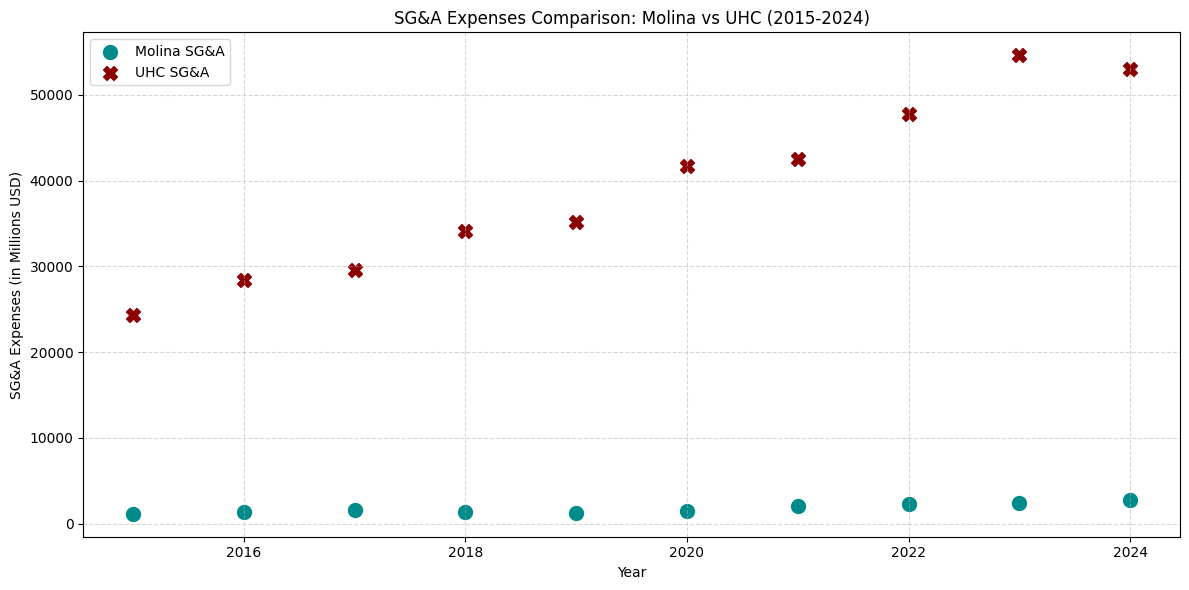

In [ ]:
# Load sheets
income_statement = pd.read_excel(file_path, sheet_name='Income Statement ')
molina_sga_sheet = pd.read_excel(file_path, sheet_name='Molina_SG&A')

# Extract relevant data
sga_expense_uhc = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].astype(float)
sga_expense_molina = molina_sga_sheet.iloc[1, 1:].astype(float)
years = list(range(2015, 2025))

# Dual Scatter Plot (Only SG&A for Molina and UHC)
plt.figure(figsize=(12, 6))

plt.scatter(years, sga_expense_molina, color='darkcyan', marker='o', s=100, label='Molina SG&A')
plt.scatter(years, -sga_expense_uhc, color='darkred', marker='X', s=100, label='UHC SG&A')

plt.title('SG&A Expenses Comparison: Molina vs UHC (2015-2024)')
plt.xlabel('Year')
plt.ylabel('SG&A Expenses (in Millions USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


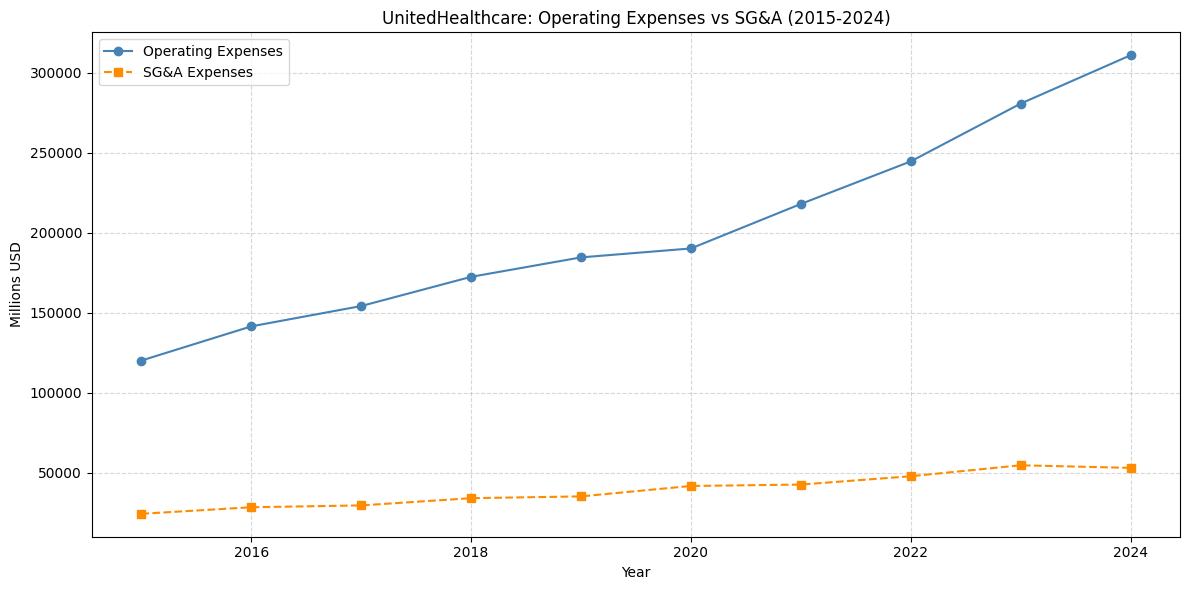

In [ ]:
# Load UnitedHealthcare data from Income Statement
income_statement = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract relevant data
revenue = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Revenue'].iloc[0, 1:].astype(float)
gross_profit = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Gross Profit'].iloc[0, 1:].astype(float)
sga_expense_uhc = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].astype(float)
years = list(range(2015, 2025))

# Derive Operating Expenses = Revenue - Gross Profit
operating_expenses_uhc = revenue - gross_profit

# Calculate SG&A as % of Operating Expenses
uhc_sga_percentage = (-sga_expense_uhc / operating_expenses_uhc) * 100

# --- Visualization ---

# 1. Plot Operating Expenses vs SG&A
plt.figure(figsize=(12, 6))
plt.plot(years, operating_expenses_uhc, marker='o', linestyle='-', label='Operating Expenses', color='steelblue')
plt.plot(years, -sga_expense_uhc, marker='s', linestyle='--', label='SG&A Expenses', color='darkorange')
plt.title('UnitedHealthcare: Operating Expenses vs SG&A (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Millions USD')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



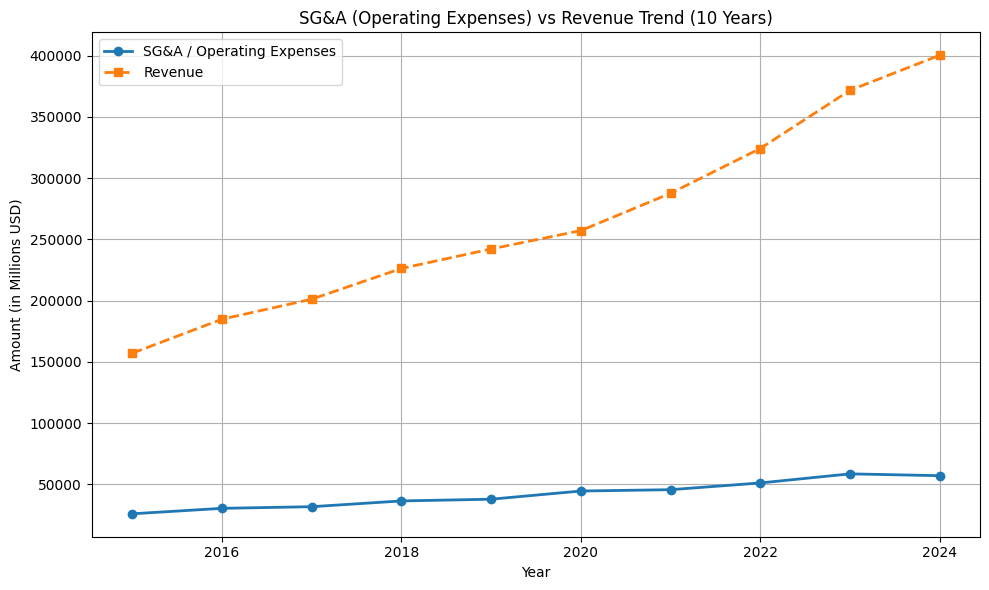

In [ ]:
# Load Income Statement
income_data = pd.read_excel(file_path, sheet_name='Income Statement ', header=1)
income_data.rename(columns={income_data.columns[0]: 'Metric'}, inplace=True)

# Extract year columns dynamically
years = [col for col in income_data.columns if isinstance(col, int) or (isinstance(col, str) and col.isdigit())]

# Extract Revenue and SG&A (Operating Expenses) data
revenue = income_data[income_data['Metric'] == 'Revenue'][years].values.flatten()
operating_expenses = income_data[income_data['Metric'] == 'Operating Expenses'][years].values.flatten()

# ---------- Trend Visualization ----------

plt.figure(figsize=(10,6))

# Plot SG&A Trend
plt.plot(years, operating_expenses, marker='o', label='SG&A / Operating Expenses', linewidth=2)

# Plot Revenue Trend
plt.plot(years, revenue, marker='s', linestyle='--', label='Revenue', linewidth=2)

plt.title("SG&A (Operating Expenses) vs Revenue Trend (10 Years)")
plt.xlabel("Year")
plt.ylabel("Amount (in Millions USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


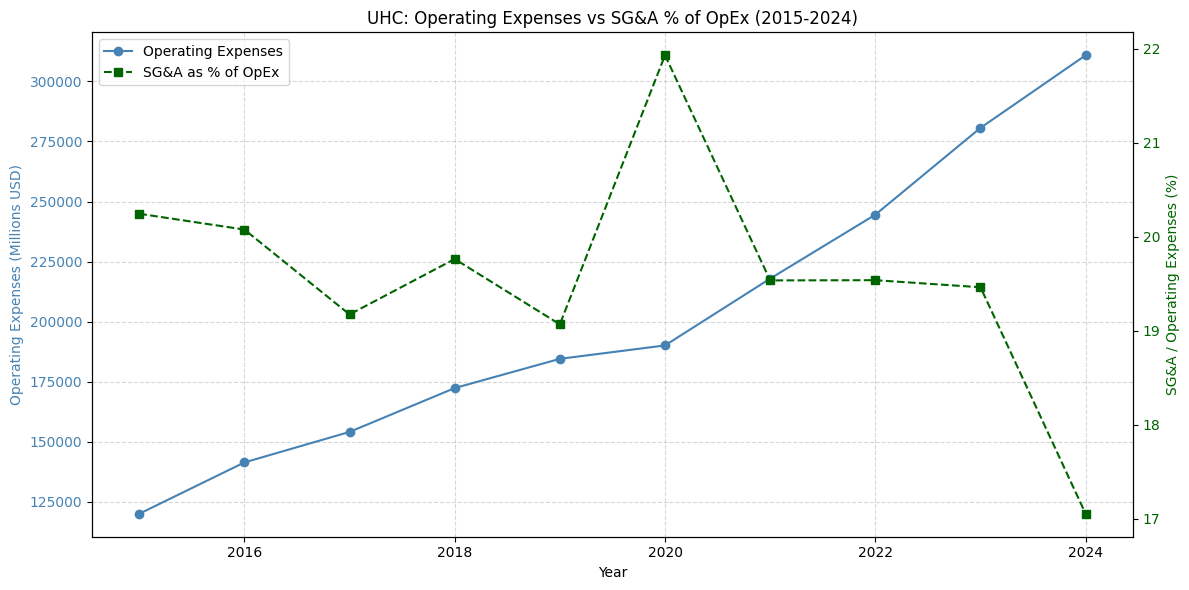

In [ ]:
# Load UnitedHealthcare data from Income Statement
income_statement = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract relevant data
revenue = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Revenue'].iloc[0, 1:].astype(float)
gross_profit = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Gross Profit'].iloc[0, 1:].astype(float)
sga_expense_uhc = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].astype(float)
years = list(range(2015, 2025))

# Derive Operating Expenses = Revenue - Gross Profit
operating_expenses_uhc = revenue - gross_profit

# Calculate SG&A as % of Operating Expenses
uhc_sga_percentage = (-sga_expense_uhc / operating_expenses_uhc) * 100

# --- Dual-axis overlapping graph ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Operating Expenses on the left axis
ax1.plot(years, operating_expenses_uhc, color='steelblue', marker='o', label='Operating Expenses')
ax1.set_xlabel('Year')
ax1.set_ylabel('Operating Expenses (Millions USD)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True, linestyle='--', alpha=0.5)

# Create second axis for SG&A %
ax2 = ax1.twinx()
ax2.plot(years, uhc_sga_percentage, color='darkgreen', marker='s', linestyle='--', label='SG&A as % of OpEx')
ax2.set_ylabel('SG&A / Operating Expenses (%)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Titles and Legends
plt.title('UHC: Operating Expenses vs SG&A % of OpEx (2015-2024)')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


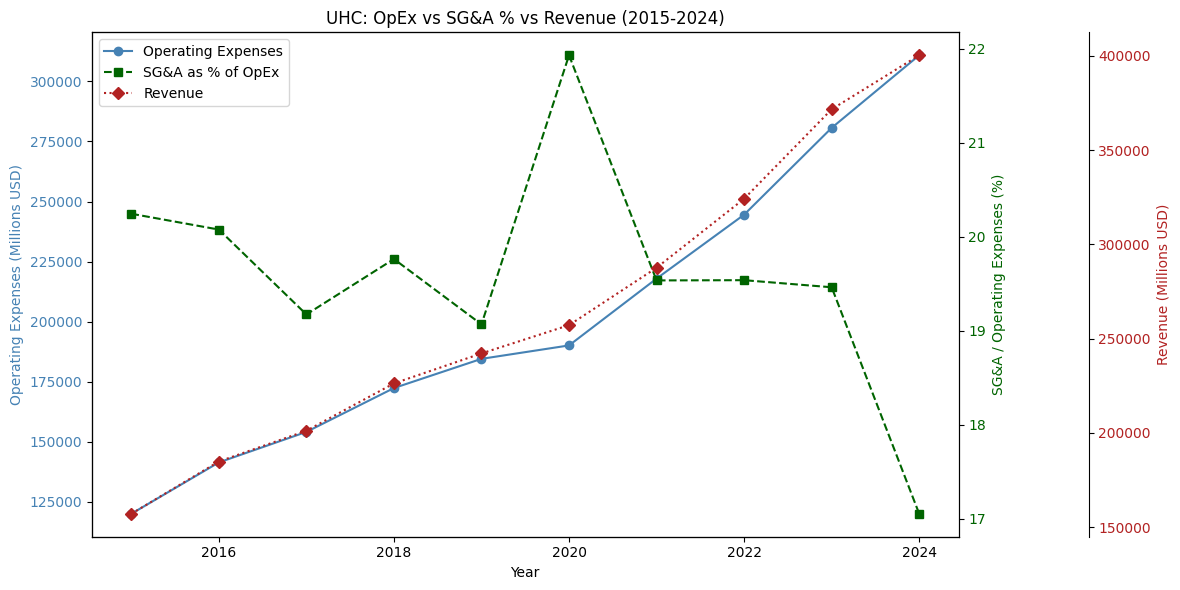

In [ ]:
# Load UnitedHealthcare data from Income Statement
income_statement = pd.read_excel(file_path, sheet_name='Income Statement ')

# Extract relevant data
revenue = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Revenue'].iloc[0, 1:].astype(float)
gross_profit = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Gross Profit'].iloc[0, 1:].astype(float)
sga_expense_uhc = income_statement.loc[income_statement['Millions of US $ except per share data'] == 'Other Operating Income Or Expenses'].iloc[0, 1:].astype(float)
years = list(range(2015, 2025))

# Calculate Operating Expenses = Revenue - Gross Profit
operating_expenses_uhc = revenue - gross_profit
uhc_sga_percentage = (-sga_expense_uhc / operating_expenses_uhc) * 100

# --- Triple-axis visualization ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# 1st Axis: Operating Expenses
ax1.plot(years, operating_expenses_uhc, color='steelblue', marker='o', label='Operating Expenses')
ax1.set_xlabel('Year')
ax1.set_ylabel('Operating Expenses (Millions USD)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# 2nd Axis: SG&A as % of OpEx
ax2 = ax1.twinx()
ax2.plot(years, uhc_sga_percentage, color='darkgreen', marker='s', linestyle='--', label='SG&A as % of OpEx')
ax2.set_ylabel('SG&A / Operating Expenses (%)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# 3rd Axis: Revenue
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.15))  # move third axis outwards
ax3.plot(years, revenue, color='firebrick', marker='D', linestyle=':', label='Revenue')
ax3.set_ylabel('Revenue (Millions USD)', color='firebrick')
ax3.tick_params(axis='y', labelcolor='firebrick')

# Titles & Combined Legends
plt.title('UHC: OpEx vs SG&A % vs Revenue (2015-2024)')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
plt.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
print(molina_data[['Metric']])

                 Metric
0  Annual SG&A Expenses
